### LSTM for Air Quality Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel('CO2 dataset.xlsx')
mylist = df.CO2.to_list()

### Data Preprocessing


In [3]:
def prep_data(time_series, n_features):
    X, y = [], []
    for i in range(len(time_series)):
        end_ix = i + n_features
        if end_ix > len(time_series)-1:
            break
            
        seq_x = time_series[i:end_ix]
        seq_y = time_series[end_ix]

        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
n_features = 3
X,y = prep_data(mylist[:200],n_features)
X_test,y_test = prep_data(mylist[200:],n_features)

In [5]:
X.shape

(197, 3)

In [6]:
X_test.shape

(12, 3)

In [7]:
n_fshape = 1
X = X.reshape((X.shape[0], X.shape[1], n_fshape))
#X_test = X.reshape((X.shape[0], X.shape[1], n_fshape))

### Build LSTM

In [8]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_features ,n_fshape)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 74.2710
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 65.2776
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 51.3036
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 26.9320
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 6.9483
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 6.6277
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 3.9289
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 3.6318
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 2.4346
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 2.3107
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 1.5912
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3740
Epoch 13/100
7/7 [==============================] - 0s

In [9]:
# demonstrate prediction for next 10 days
x_input = np.array([15.60000 ,15.60000, 14.80000])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        #print(x_input)
        x_input = x_input.reshape((1,  n_features, n_fshape))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_features, n_fshape))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[14.672999]
[14.672999, 14.571199, 14.346914, 14.1503525, 13.978943, 13.804387, 13.632618, 13.467546, 13.306956, 13.15032]


In [10]:
X[2].reshape((1, n_features, n_fshape))

array([[[0.00555],
        [0.00548],
        [0.00542]]])

In [11]:
def op(vals):
    y_op = []
    final = []
    for i in range(len(vals)):
        op = model.predict(vals[i].reshape((1, n_features, n_fshape)))
        y_op.append(op)    
    return y_op

def thefinalop(test):
    predictions=op(test)
    final = []
    for i in range(len(test)):
        final.append(predictions[i][0][0])
    return final

RMSE: 0.5810943138269132
MAE: 0.37360731701303257


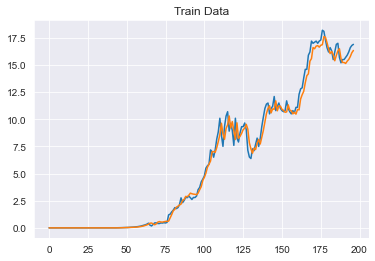

In [14]:
on_train_data=thefinalop(X)

sns.set_style('darkgrid')
plt.title('Train Data')
plt.plot(y)
plt.plot(haha)

print('RMSE:', np.sqrt(mean_squared_error(y,on_train_data)))
print('MAE:', mean_absolute_error(y,on_train_data))

RMSE: 0.4746583799858832
MAE: 0.38429471651713065


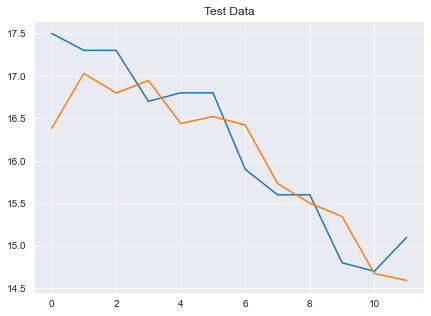

In [13]:
testing=thefinalop(X_test)

plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
plt.title('Test Data')
plt.plot(y_test)
plt.plot(testing)

print('RMSE:', np.sqrt(mean_squared_error(y_test,testing)))
print('MAE:', mean_absolute_error(y_test,testing))

Thank you!